In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df =pd.read_csv("cleaned_grocery_data_with_reviews.csv")
df.columns =df.columns.str.strip().str.lower().str.title()

df["Discount Status"] = df["Discount"].map({1: "Discounted", 0: "Full Price"})
df =df[df["Rating"].between(0, 5)].copy()

In [17]:
kde_data =[]
colors ={"Discounted": "red", "Full Price": "blue"}

for label in ["Discounted", "Full Price"]:
    subset = df[df["Discount Status"] == label]["Rating"]
    sns.kdeplot(subset, bw_adjust=0.3)
    x, y = line.get_data()
    line = plt.gca().get_lines()[0]
    plt.clf()
    kde_data.append((label, x, y))

<Figure size 640x480 with 0 Axes>

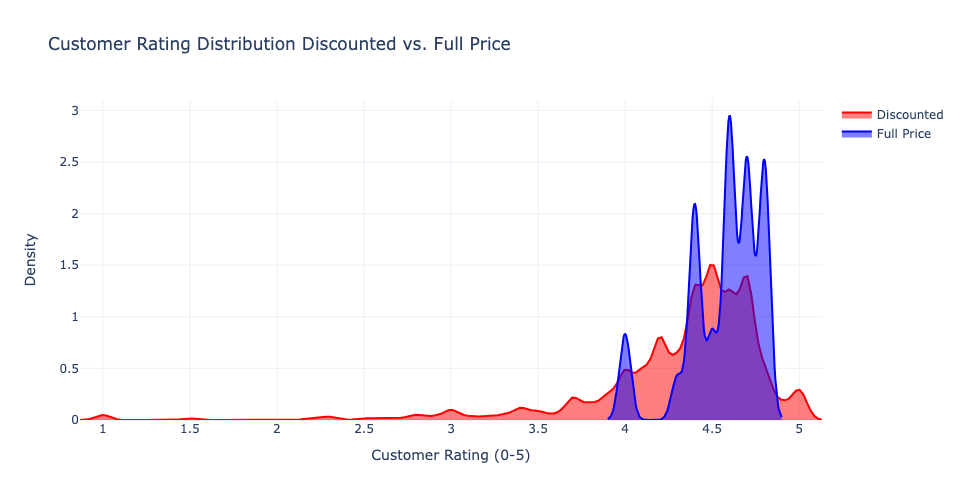

In [20]:
plot = go.Figure()

for label, x, y in kde_data:
    plot.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        name=label,
        fill='tozeroy',
        line=dict(color=colors[label]),
        hovertemplate=f"{label}<br>Rating: %{{x:.2f}}<br>Density: %{{y:.3f}}"
    ))

plot.update_layout(
    title="Customer Rating Distribution Discounted vs. Full Price",
    xaxis_title="Customer Rating (0-5)",
    yaxis_title="Density",
    template="plotly_white",
    height=500
)
plot.show()